# Computing gradients using Sobel operator

OpenCV's `cv2.Sobel` function computes image gradient approximation using a linear filter of a specified size. Through function parameters, you can specify exactly what derivative needs to be computed, what kernel should be used, and the datatype for the output image.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512) image_grey: uint8
[ 70 64 64 66 66 64 64 64 64 61 64 66 72 89 78 66 64 61 53 59 ]
[ 70 64 66 61 59 61 61 59 64 61 84 74 103 124 116 102 82 68 56 56 ]
[ 64 66 64 61 59 59 61 59 66 70 80 98 141 163 152 144 111 87 68 59 ]
[ 61 68 66 66 56 59 64 82 74 82 102 130 164 194 193 176 151 124 105 72 ]
[ 64 72 74 61 53 50 53 92 93 78 95 125 176 203 205 192 178 165 155 105 ]
[ 72 89 89 64 53 50 50 66 98 78 66 82 165 205 205 200 194 193 186 143 ]
[ 68 102 99 85 61 53 56 78 117 87 68 74 160 205 205 200 200 199 194 174 ]
[ 66 98 105 98 84 78 76 96 112 87 64 93 178 207 205 205 207 204 201 193 ]
[ 78 72 92 105 93 93 98 93 85 74 74 129 197 210 207 209 211 206 207 201 ]
[ 98 70 70 89 93 98 90 84 68 76 118 174 207 210 210 212 212 206 207 203 ]


<Figure size 360x360 with 0 Axes>

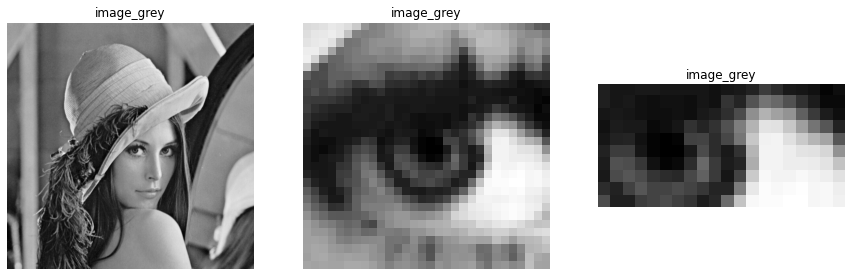

In [2]:
image_grey = cv2.imread('../data/Lena.png', 0)

############################################################
print_image('Original', 'image_grey',  image_grey,260,270,260,280)
plt.figure(figsize=(5,5))
plt_view_image(plt,[["image_grey",image_grey],
                    ["image_grey",image_grey[250:280,250:280]],
                    ["image_grey",image_grey[260:270,260:280]],
                   ])

In [3]:
dx_Sobel = cv2.Sobel(image_grey, cv2.CV_32F, 1, 0)
dy_Sobel = cv2.Sobel(image_grey, cv2.CV_32F, 0, 1)


################################################
print_image('dx_Sobel', 'dx_Sobel',  dx_Sobel,260,270,260,278)
print_image('dy_Sobel', 'dy_Sobel',  dy_Sobel,260,270,260,278)

------  dx_Sobel-----------------    Shape(512, 512) dx_Sobel: float32
[ -8.0 -18.0 1.0 -3.0 -4.0 -4.0 -4.0 3.0 -4.0 28.0 23.0 29.0 98.0 23.0 -62.0 -67.0 -57.0 -51.0 -22.0 5.0 ]
[ -8.0 -14.0 -9.0 -17.0 -4.0 4.0 -4.0 11.0 12.0 54.0 59.0 107.0 188.0 43.0 -86.0 -123.0 -130.0 -106.0 -54.0 -18.0 ]
[ -2.0 1.0 -15.0 -27.0 -11.0 14.0 21.0 23.0 24.0 76.0 117.0 203.0 244.0 64.0 -78.0 -158.0 -200.0 -158.0 -120.0 -73.0 ]
[ 19.0 20.0 -20.0 -46.0 -27.0 18.0 88.0 65.0 -3.0 72.0 171.0 266.0 271.0 98.0 -66.0 -152.0 -188.0 -158.0 -192.0 -175.0 ]
[ 55.0 42.0 -49.0 -88.0 -43.0 5.0 123.0 138.0 -16.0 0.0 146.0 323.0 343.0 127.0 -45.0 -107.0 -113.0 -100.0 -222.0 -260.0 ]
[ 99.0 75.0 -78.0 -131.0 -71.0 -11.0 99.0 197.0 19.0 -111.0 42.0 371.0 455.0 154.0 -26.0 -54.0 -42.0 -45.0 -185.0 -261.0 ]
[ 111.0 118.0 -59.0 -133.0 -98.0 -21.0 84.0 206.0 21.0 -178.0 -16.0 397.0 499.0 157.0 -17.0 -19.0 -10.0 -26.0 -111.0 -191.0 ]
[ 29.0 123.0 16.0 -79.0 -84.0 -16.0 61.0 120.0 -28.0 -156.0 54.0 443.0 440.0 109.0 -10.0 3.0 -

<Figure size 1080x1080 with 0 Axes>

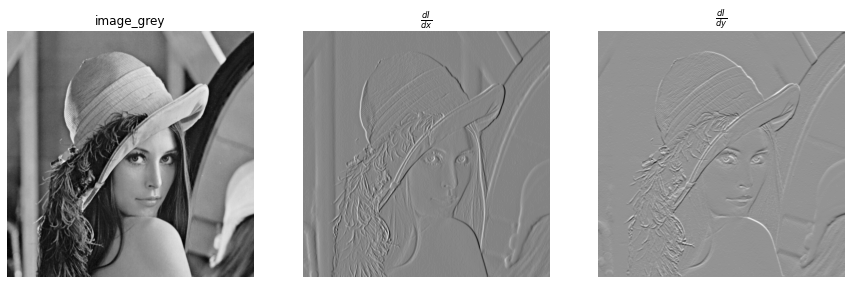

In [4]:
plt.figure(figsize=(15,15))
plt_view_image(plt,[["image_grey",image_grey],
                    [r'$\frac{dI}{dx}$',dx_Sobel],
                    [r'$\frac{dI}{dy}$',dy_Sobel]
                   ])

cv2.imshow('image_0_grey -> dx_Sobel, dy_Sobel', np.hstack([image_grey, dx_Sobel, dy_Sobel]))
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1080x1080 with 0 Axes>

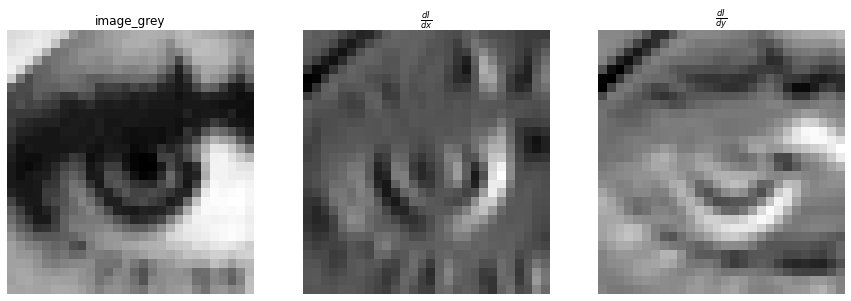

In [6]:
plt.figure(figsize=(15,15))
plt_view_image(plt,[["image_grey",image_grey[250:280,250:278]],
                    [r'$\frac{dI}{dx}$',dx_Sobel[250:280,250:278]],
                    [r'$\frac{dI}{dy}$',dy_Sobel[250:280,250:278]]
                   ])

cv2.imshow(r'image_grey -> $\frac{dI}{dx}$, $\frac{dI}{dy}$', 
           np.hstack([image_grey[250:280,250:280], dx_Sobel[250:280,250:280], dy_Sobel[250:280,250:280]]))
cv2.waitKey()
cv2.destroyAllWindows()